# Logistic Regression using python

## - what is logistic regression ?

**Logistic Regression is a classification algorithm, not a regression one (despite its name). It’s used when your target variable is categorical, most commonly binary (e.g., 0 or 1, True or False, Yes or No).**

## Why Not Use Linear Regression?
In binary classification, we want the output to be between 0 and 1 (like a probability).
But linear regression can output any number, including negatives or values >1.

So, **logistic regression uses the sigmoid function to "squash" outputs into a probability range between 0 and 1.**

<h4>Logistic Regression Equation</h4>
<bold>First, compute the linear combination:</bold>
<center>y = wx+b</center>
<bold>Then, apply the sigmoid function:</bold>
<center>y^ = σ(z) = 1 / (1 + e^(-z))</center>
<p>This gives us a probability.</p>
<p>If 𝑦^ > 0.5y^ > 0.5, we classify as 1</p>
<p>If 𝑦^ <= 0.5y^>0.5, we classify as 0</p>

<h3>How Training Works (Gradient Descent)</h3>
<p>Just like in linear regression:</p>
<p>  1. Initialize weights and bias</p>
<p>  2. Use gradient descent to minimize the loss</p>
<p>  3. Update weights:</p>
<center> <strong>𝑤 ← 𝑤 − 𝛼 ∂Loss/∂w</strong>
<br/>
<strong>𝑏 ← 𝑏 − 𝛼 ∂Loss/∂b </strong> </center>

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
class LogisticRegression:
    def __init__ (self, learning_rate=0.1, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, Y):
        self.m, self.n = X.shape
        self.W = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y

        for i in range(self.epochs):
            z = np.dot(self.X, self.W) + self.b
            y_pred = self.sigmoid(z)

            if i % 200 == 0:
                loss = -np.mean(self.Y * np.log(y_pred + 1e-9) + (1 - self.Y) * np.log(1 - y_pred + 1e-9))
                print(f"Epoch {i}, Loss: {loss:.4f}")

            self.update_weights(y_pred)

        return self

    def update_weights(self, y_pred):
        dw = (1 / self.m) * np.dot(self.X.T, (y_pred - self.Y))
        db = (1 / self.m) * np.sum(y_pred - self.Y)

        self.W -= self.learning_rate * dw
        self.b -= self.learning_rate * db

        return self

    def predict_prob(self, X):
        return self.sigmoid(np.dot(X, self.W) + self.b)

    def predict(self, X):
        return (self.predict_prob(X) >= 0.5).astype(int)

    def accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)


Epoch 0, Loss: 0.6931
Epoch 200, Loss: 0.4137
Epoch 400, Loss: 0.2891
Epoch 600, Loss: 0.2223
Epoch 800, Loss: 0.1813
Training Accuracy: 1.00


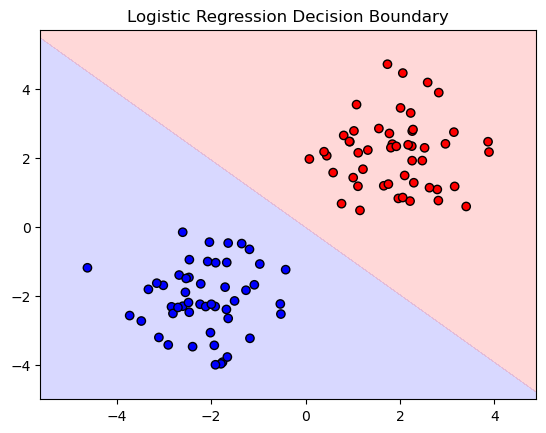

In [15]:
# --- Driver Code ---
def main():
    # Generate synthetic binary classification data
    np.random.seed(42)
    X_class0 = np.random.randn(50, 2) + np.array([-2, -2])
    X_class1 = np.random.randn(50, 2) + np.array([2, 2])

    X = np.vstack((X_class0, X_class1))
    y = np.array([0] * 50 + [1] * 50)

    # Train logistic regression
    model = LogisticRegression(learning_rate=0.001, epochs=1000)
    model.fit(X, y)

    # Predict and evaluate
    y_pred = model.predict(X)
    acc = model.accuracy(y, y_pred)
    print(f"Training Accuracy: {acc:.2f}")

    # Plot decision boundary
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100),
                           np.linspace(x2_min, x2_max, 100))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    probs = model.predict_prob(grid).reshape(xx1.shape)

    plt.contourf(xx1, xx2, probs, levels=[0, 0.5, 1], alpha=0.3, cmap="bwr")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolor="k")
    plt.title("Logistic Regression Decision Boundary")
    plt.show()

main()